In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt
import dtale

In [157]:
d = dtale.show(houses, notebook = True)

In [8]:
houses = pd.read_csv('../../train.csv', index_col = 0)

In [9]:
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
houses.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [36]:
df2 = houses.iloc[:, np.r_[-1, 39:59]]

In [12]:
d2 = dtale.show(df2, notebook = True)

In [13]:
df2.dtypes

SalePrice         int64
CentralAir       object
Electrical       object
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual      object
TotRmsAbvGrd      int64
Functional       object
Fireplaces        int64
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
dtype: object

In [14]:
df2.head()

,SalePrice,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish
Id,,,,,,,,,,,,,,,,,,,,,
1,208500,Y,SBrkr,856,854,0,1710,1,0,2,...,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn
2,181500,Y,SBrkr,1262,0,0,1262,0,1,2,...,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn
3,223500,Y,SBrkr,920,866,0,1786,1,0,2,...,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn
4,140000,Y,SBrkr,961,756,0,1717,1,0,1,...,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf
5,250000,Y,SBrkr,1145,1053,0,2198,1,0,2,...,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn


In [15]:
df2.describe()

,SalePrice,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000
mean,180921.195890,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164
std,79442.502883,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725
min,34900.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000
25%,129975.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000
50%,163000.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000
75%,214000.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000
max,755000.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1250c9250>,
      dtype=object)

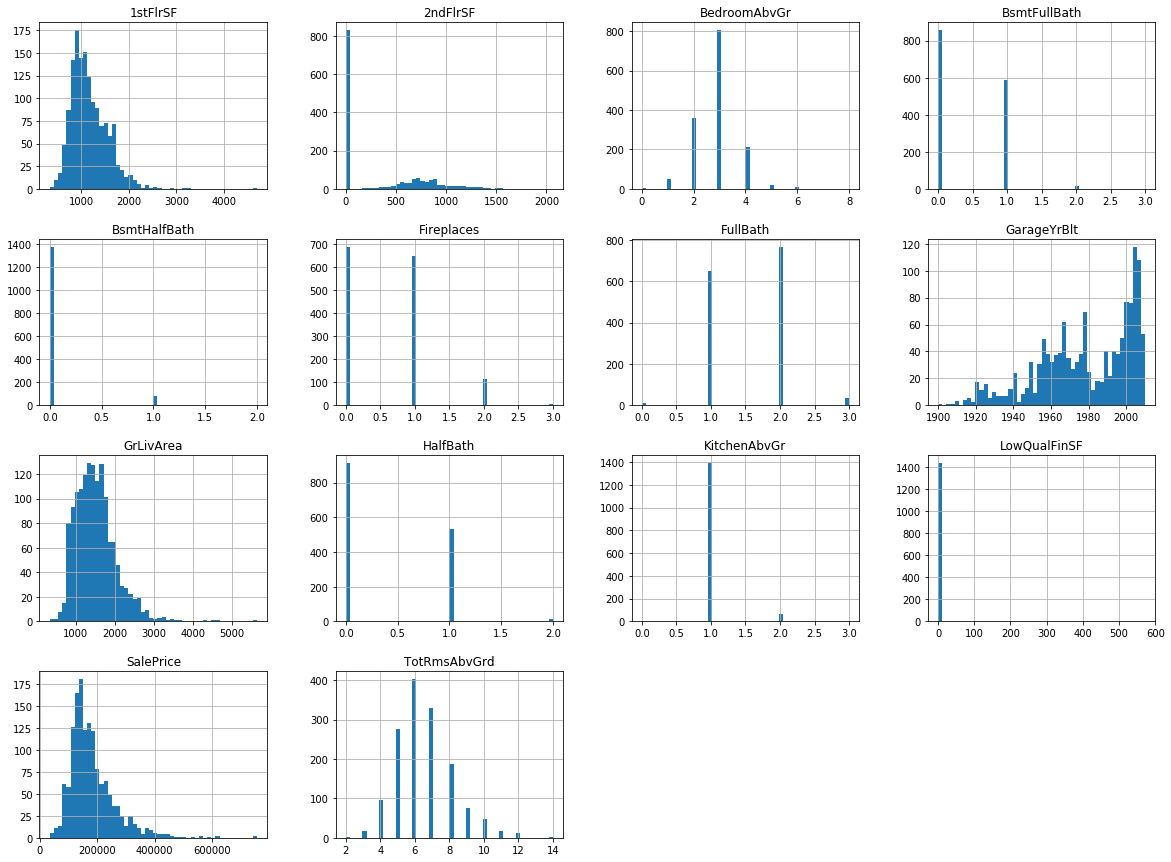

In [16]:
df2.hist(bins=50, figsize=(20,15))

In [17]:
df2.describe()

,SalePrice,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000
mean,180921.195890,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164
std,79442.502883,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725
min,34900.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000
25%,129975.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000
50%,163000.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000
75%,214000.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000
max,755000.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000


In [18]:
for col in df2.columns:
    print (col)


SalePrice
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish


In [19]:
categorical = ["CentralAir", "Electrical", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", 
               "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd", "Functional", 
              "Fireplaces", "FireplaceQu", "GarageType", "GarageFinish"]
for feature in categorical:
    print(df2[feature].value_counts())
    print('')

Y    1365
N      95
Name: CentralAir, dtype: int64

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

0    913
1    535
2     12
Name: HalfBath, dtype: int64

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype

In [20]:
# Generate the boolean flags indicating missing rows and columns
missingRows = pd.isnull(df2).sum(axis=1) > 0
missingCols = pd.isnull(df2).sum(axis=0) > 0
print('The columns with missingness are %s' %(df2.columns[missingCols]))
print("The rows with missingness are %s" %(df2.index[missingRows]))
#df2 = df2[~missingRows]

The columns with missingness are Index(['Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish'],
      dtype='object')
The rows with missingness are Int64Index([   1,    6,   11,   13,   16,   18,   19,   20,   27,   30,
            ...
            1446, 1447, 1449, 1450, 1451, 1453, 1454, 1455, 1459, 1460],
           dtype='int64', name='Id', length=699)


In [21]:
df2.isna().sum()

SalePrice         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
dtype: int64

In [27]:
# houseFeatures = df2.drop(["SalePrice", "CentralAir","Electrical", "KitchenQual", "Functional", 
#                           "FireplaceQu","GarageType","GarageFinish", "1stFlrSF","2ndFlrSF",
#                           "LowQualFinSF", "BedroomAbvGr"], axis=1)
# prices = df2["SalePrice"]

In [26]:
# from sklearn.linear_model import LinearRegression

# lm = LinearRegression()
# lm.fit(houseFeatures, prices)
# residuals = prices - lm.predict(houseFeatures)
# plt.hist(residuals)

In [28]:
# print('R^2 is equal to %.3f' %(lm.score(houseFeatures, prices)))
# print('RSS is equal to %.3f' %(np.sum((prices-lm.predict(houseFeatures))**2)))
# print('The intercept is %.3f' %(lm.intercept_))
# print('The slopes are %s' %(lm.coef_))

In [29]:
# print('negative slope column names %s' %(houseFeatures.columns[lm.coef_<0]))
# print('positive slope column names %s' %(houseFeatures.columns[lm.coef_>0]))

(array([  1.,   0.,   1.,   0.,   0.,   9.,  65., 407., 227.,  51.]),
 array([-2.05330127, -1.79023597, -1.52717067, -1.26410538, -1.00104008,
        -0.73797478, -0.47490948, -0.21184418,  0.05122111,  0.31428641,
         0.57735171]),
 <a list of 10 Patch objects>)

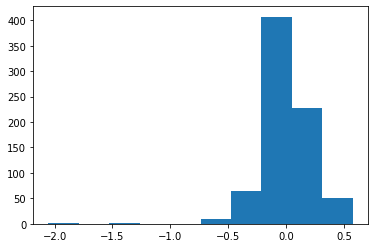

In [66]:
# lm.fit(houseFeatures, np.log(prices))
# residuals = np.log(prices) - lm.predict(houseFeatures)
# plt.hist(residuals)

In [67]:
# print('The R^2 of the new linear model is %.3f ' %(lm.score(houseFeatures, np.log(prices))))

The R^2 of the new linear model is 0.642 


In [68]:
# scores = {} # used to record the R^2 of each 3-feature combinations

# for idx, name1 in enumerate(houseFeatures.columns):
#         myColumns = houseFeatures.columns[(idx+1):]
#         for idx2, name2 in enumerate(myColumns):
#             myColumns2 = myColumns[(idx2+1):]
#             for idx3, name3 in enumerate(myColumns2):                
#                 X2 = houseFeatures[[name1, name2, name3]]
#                 lm.fit(X2, np.log(prices))
#                 scores[(name1, name2, name3)] = lm.score(X2, np.log(prices))

In [69]:
# sorted(scores.items(), key=lambda t:t[1], reverse=True)[:10]

[(('GrLivArea', 'BsmtFullBath', 'GarageYrBlt'), 0.6222967770197778),
 (('GrLivArea', 'KitchenAbvGr', 'GarageYrBlt'), 0.6076212488573745),
 (('GrLivArea', 'Fireplaces', 'GarageYrBlt'), 0.6044549237618264),
 (('GrLivArea', 'HalfBath', 'GarageYrBlt'), 0.6020104061291633),
 (('GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt'), 0.5971606902779889),
 (('GrLivArea', 'FullBath', 'GarageYrBlt'), 0.5971177659295784),
 (('GrLivArea', 'BsmtHalfBath', 'GarageYrBlt'), 0.5969122143705623),
 (('GrLivArea', 'BsmtFullBath', 'FullBath'), 0.5380356492797582),
 (('BsmtFullBath', 'TotRmsAbvGrd', 'GarageYrBlt'), 0.5205119251051062),
 (('GrLivArea', 'BsmtFullBath', 'KitchenAbvGr'), 0.5008592501595368)]

In [70]:
# import statsmodels.api as sm
# x = sm.add_constant(houseFeatures)
# # Notice that the dependent variable (y) comes before the independent variables (x)
# # Use df.columns.values to get all the column names
# model = sm.OLS(np.log(prices), x)
# results = model.fit()
# print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     149.8
Date:                Thu, 20 Feb 2020   Prob (F-statistic):          4.80e-161
Time:                        18:00:29   Log-Likelihood:                 101.45
No. Observations:                 761   AIC:                            -182.9
Df Residuals:                     751   BIC:                            -136.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9345      0.799      1.170   

/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [71]:
# pValues = results.pvalues
# print('The significant coefficients')
# pValues[pValues<0.05]

The significant coefficients


GrLivArea       1.663613e-31
BsmtFullBath    6.526010e-11
KitchenAbvGr    5.822247e-07
Fireplaces      8.963957e-03
GarageYrBlt     5.406966e-37
dtype: float64

In [72]:
# print('The insignificant coefficients')
# pValues[pValues>=0.05]

The insignificant coefficients


const           0.242250
BsmtHalfBath    0.233509
FullBath        0.077166
HalfBath        0.064994
TotRmsAbvGrd    0.092869
dtype: float64

2020-02-24 10:41:56,469 - INFO     - NumExpr defaulting to 4 threads.


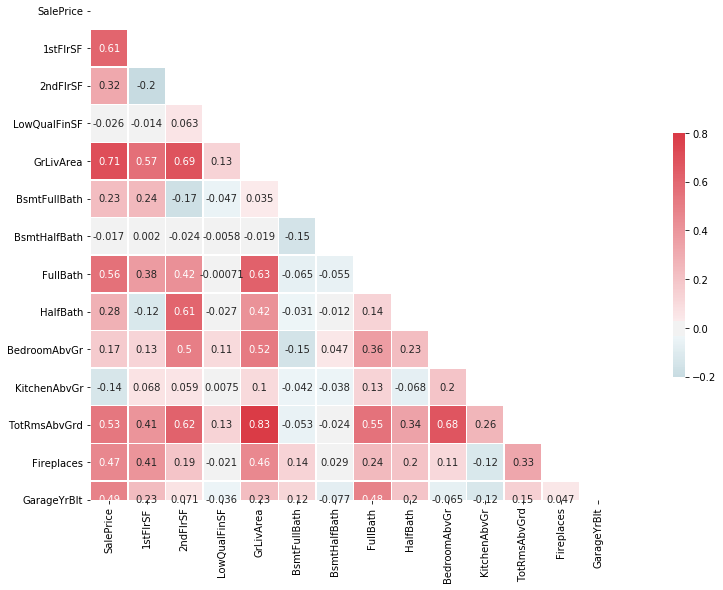

In [30]:
import seaborn as sns
# Generate a mask for the upper triangle  # using np.tril will mask the lower triangle
mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Create the heatmap  # annot =True shows the correlation values
sns.heatmap(df2.corr(), vmax=.8, center=0,
            square=True, linewidths=.5, mask=mask, cmap=cmap, annot=True,annot_kws={'size': 10},cbar_kws={"shrink": .5})

In [43]:
sales = df2["SalePrice"]


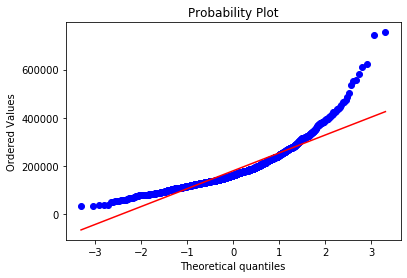

In [44]:
import pylab 
import scipy.stats as stats

  
stats.probplot(sales, dist="norm", plot=pylab)
pylab.show()

# notice the q-q plot shows prices are not normally distributed

In [45]:
df2['log_sales'] = np.log(df2['SalePrice'])
df2.head()

/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,SalePrice,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,log_sales
Id,,,,,,,,,,,,,,,,,,,,,
1,208500,Ex,Y,SBrkr,856,854,0,1710,1,0,...,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,12.247694
2,181500,Ex,Y,SBrkr,1262,0,0,1262,0,1,...,3,1,TA,6,Typ,1,TA,Attchd,1976.0,12.109011
3,223500,Ex,Y,SBrkr,920,866,0,1786,1,0,...,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,12.317167
4,140000,Gd,Y,SBrkr,961,756,0,1717,1,0,...,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,11.849398
5,250000,Ex,Y,SBrkr,1145,1053,0,2198,1,0,...,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,12.429216


In [46]:
logsales = df2["log_sales"]


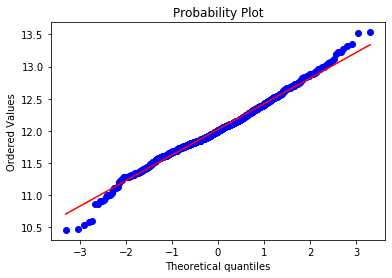

In [47]:
stats.probplot(logsales, dist="norm", plot=pylab)
pylab.show()

In [35]:
# a bunch of ANOVA tests
df2.head()
df2.columns

Index(['SalePrice', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish'],
      dtype='object')

In [39]:
from statsmodels.formula.api import ols
lm = ols("SalePrice ~ HeatingQC", data = df2).fit()
table1 = sm.stats.anova_lm(lm)
print(table1)

# Conclude Heating Quality matters

               df        sum_sq       mean_sq          F        PR(>F)
HeatingQC     4.0  1.800151e+12  4.500378e+11  88.394462  2.667062e-67
Residual   1455.0  7.407760e+12  5.091244e+09        NaN           NaN


In [40]:
lm = ols("SalePrice ~ CentralAir", data = df2).fit()
table2 = sm.stats.anova_lm(lm)
print(table2)

                df        sum_sq       mean_sq          F        PR(>F)
CentralAir     1.0  5.816255e+11  5.816255e+11  98.305344  1.809506e-22
Residual    1458.0  8.626286e+12  5.916520e+09        NaN           NaN


In [41]:

lm = ols("SalePrice ~ Electrical", data = df2).fit()
table3 = sm.stats.anova_lm(lm)
print(table3)

                df        sum_sq       mean_sq          F        PR(>F)
Electrical     4.0  5.494534e+11  1.373634e+11  23.067673  1.663249e-18
Residual    1454.0  8.658278e+12  5.954799e+09        NaN           NaN


In [48]:

lm = ols("log_sales ~ Functional", data = df2).fit()
table4 = sm.stats.anova_lm(lm)
print(table4)

                df      sum_sq   mean_sq         F    PR(>F)
Functional     6.0    5.538054  0.923009  5.901244  0.000004
Residual    1453.0  227.262605  0.156409       NaN       NaN


In [49]:
lm = ols("SalePrice ~ KitchenQual", data = df2).fit()
table5 = sm.stats.anova_lm(lm)
print(table5)

                 df        sum_sq       mean_sq           F         PR(>F)
KitchenQual     3.0  4.204320e+12  1.401440e+12  407.806352  3.032213e-192
Residual     1456.0  5.003592e+12  3.436533e+09         NaN            NaN


In [51]:
lm = ols("log_sales ~ FireplaceQu", data = df2).fit()
table6 = sm.stats.anova_lm(lm)
print(table6)

                df     sum_sq   mean_sq          F        PR(>F)
FireplaceQu    4.0  11.819725  2.954931  25.585297  6.409799e-20
Residual     765.0  88.352396  0.115493        NaN           NaN


In [52]:
lm = ols("SalePrice ~ GarageType", data = df2).fit()
table7 = sm.stats.anova_lm(lm)
print(table7)

                df        sum_sq       mean_sq          F        PR(>F)
GarageType     5.0  1.778186e+12  3.556371e+11  71.522123  1.247154e-66
Residual    1373.0  6.827115e+12  4.972407e+09        NaN           NaN


In [53]:
lm = ols("SalePrice ~ Fireplaces", data = df2).fit()
table8 = sm.stats.anova_lm(lm)
print(table8)

                df        sum_sq       mean_sq           F        PR(>F)
Fireplaces     1.0  2.007532e+12  2.007532e+12  406.503866  6.141487e-80
Residual    1458.0  7.200379e+12  4.938532e+09         NaN           NaN


In [54]:
lm = ols("log_sales ~ Fireplaces", data = df2).fit()
table8 = sm.stats.anova_lm(lm)
print(table8)

                df      sum_sq    mean_sq           F        PR(>F)
Fireplaces     1.0   55.769899  55.769899  459.312902  8.421350e-89
Residual    1458.0  177.030760   0.121420         NaN           NaN


In [55]:
lm = ols("SalePrice ~ GarageYrBlt", data = df2).fit()
table9 = sm.stats.anova_lm(lm)
print(table9)

                 df        sum_sq       mean_sq           F        PR(>F)
GarageYrBlt     1.0  2.035564e+12  2.035564e+12  426.648985  8.705128e-83
Residual     1377.0  6.569737e+12  4.771050e+09         NaN           NaN


In [56]:
lm = ols("SalePrice ~ FullBath", data = df2).fit()
table10 = sm.stats.anova_lm(lm)
print(table10)

              df        sum_sq       mean_sq           F         PR(>F)
FullBath     1.0  2.894450e+12  2.894450e+12  668.430296  1.236470e-121
Residual  1458.0  6.313461e+12  4.330220e+09         NaN            NaN


In [57]:
lm = ols("log_sales ~ FullBath", data = df2).fit()
table10 = sm.stats.anova_lm(lm)
print(table10)

              df      sum_sq    mean_sq           F         PR(>F)
FullBath     1.0   82.353698  82.353698  798.099817  2.118958e-140
Residual  1458.0  150.446961   0.103187         NaN            NaN


In [58]:
lm = ols("SalePrice ~ HalfBath", data = df2).fit()
table11 = sm.stats.anova_lm(lm)
print(table11)

              df        sum_sq       mean_sq           F        PR(>F)
HalfBath     1.0  7.432366e+11  7.432366e+11  128.018964  1.650473e-28
Residual  1458.0  8.464675e+12  5.805675e+09         NaN           NaN


In [59]:
lm = ols("SalePrice ~ ExterQual", data = houses).fit()
table12 = sm.stats.anova_lm(lm)
print(table12)

               df        sum_sq       mean_sq           F         PR(>F)
ExterQual     3.0  4.395744e+12  1.465248e+12  443.334831  1.439551e-204
Residual   1456.0  4.812167e+12  3.305060e+09         NaN            NaN


In [60]:
lm = ols("SalePrice ~ MSZoning", data = houses).fit()
table13 = sm.stats.anova_lm(lm)
print(table13)

              df        sum_sq       mean_sq          F        PR(>F)
MSZoning     4.0  9.904000e+11  2.476000e+11  43.840282  8.817634e-35
Residual  1455.0  8.217511e+12  5.647774e+09        NaN           NaN


In [67]:
model1_df = houses[["Neighborhood", "OverallQual", "YearBuilt", "YearRemodAdd", 
                  "RoofStyle", "Exterior1st", "Exterior2nd", "ExterQual",
                  "Foundation", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", 
                  "TotalBsmtSF", "HeatingQC", "GrLivArea", "KitchenQual", 
                  "Fireplaces", "GarageArea", "SalePrice"]]
model1_df['log_sales'] = np.log(model1_df['SalePrice'])
model1_df.head()

/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,GrLivArea,KitchenQual,Fireplaces,GarageArea,SalePrice,log_sales
Id,,,,,,,,,,,,,,,,,,,,
1,CollgCr,7,2003,2003,Gable,VinylSd,VinylSd,Gd,PConc,706,0,150,856,Ex,1710,Gd,0,548,208500,12.247694
2,Veenker,6,1976,1976,Gable,MetalSd,MetalSd,TA,CBlock,978,0,284,1262,Ex,1262,TA,1,460,181500,12.109011
3,CollgCr,7,2001,2002,Gable,VinylSd,VinylSd,Gd,PConc,486,0,434,920,Ex,1786,Gd,1,608,223500,12.317167
4,Crawfor,7,1915,1970,Gable,Wd Sdng,Wd Shng,TA,BrkTil,216,0,540,756,Gd,1717,Gd,1,642,140000,11.849398
5,NoRidge,8,2000,2000,Gable,VinylSd,VinylSd,Gd,PConc,655,0,490,1145,Ex,2198,Gd,1,836,250000,12.429216


In [62]:
d3 = dtale.show(model1_df, notebook = True)

In [63]:
# Dummifying nine categorical columns

In [68]:
# dummify Neighborhood column
from sklearn.preprocessing import OneHotEncoder
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( model1_df[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
model1_df = pd.concat( (model1_df.drop(["Neighborhood"], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )


# dummify RoofStyle column

RoofStyle_ohe = OneHotEncoder( drop='first', sparse = False )
RoofStyle_enc = RoofStyle_ohe.fit_transform( model1_df[['RoofStyle']] )
RoofStyle_enc = pd.DataFrame( RoofStyle_enc, columns=RoofStyle_ohe.get_feature_names(['RoofStyle']) )
model1_df = pd.concat( (model1_df.drop(["RoofStyle"], axis=1).reset_index(drop = True), RoofStyle_enc), axis = 1 )


#dummify Exterior1st Column

Exterior1st_ohe = OneHotEncoder( drop='first', sparse = False )
Exterior1st_enc = Exterior1st_ohe.fit_transform( model1_df[['Exterior1st']] )
Exterior1st_enc = pd.DataFrame( Exterior1st_enc, columns=Exterior1st_ohe.get_feature_names(['Exterior1st']) )
model1_df = pd.concat( (model1_df.drop(["Exterior1st"], axis=1).reset_index(drop = True), Exterior1st_enc), axis = 1 )


#dummify Exterior2nd Column

Exterior2nd_ohe = OneHotEncoder( drop='first', sparse = False )
Exterior2nd_enc = Exterior2nd_ohe.fit_transform( model1_df[['Exterior2nd']] )
Exterior2nd_enc = pd.DataFrame( Exterior2nd_enc, columns=Exterior2nd_ohe.get_feature_names(['Exterior2nd']) )
model1_df = pd.concat( (model1_df.drop(["Exterior2nd"], axis=1).reset_index(drop = True), Exterior2nd_enc), axis = 1 )


#dummify Foundation Column

Foundation_ohe = OneHotEncoder( drop='first', sparse = False )
Foundation_enc = Foundation_ohe.fit_transform( model1_df[['Foundation']] )
Foundation_enc = pd.DataFrame( Foundation_enc, columns=Foundation_ohe.get_feature_names(['Foundation']) )
model1_df = pd.concat( (model1_df.drop(["Foundation"], axis=1).reset_index(drop = True), Foundation_enc), axis = 1 )


#dummify Heating QC Column

HeatingQC_ohe = OneHotEncoder( drop='first', sparse = False )
HeatingQC_enc = HeatingQC_ohe.fit_transform( model1_df[['HeatingQC']] )
HeatingQC_enc = pd.DataFrame( HeatingQC_enc, columns=HeatingQC_ohe.get_feature_names(['HeatingQC']) )
model1_df = pd.concat( (model1_df.drop(["HeatingQC"], axis=1).reset_index(drop = True), HeatingQC_enc), axis = 1 )


# dummify KitchenQual column
from sklearn.preprocessing import OneHotEncoder
KitchenQual_ohe = OneHotEncoder( drop='first', sparse = False )
KitchenQual_enc = KitchenQual_ohe.fit_transform( model1_df[['KitchenQual']] )
KitchenQual_enc = pd.DataFrame( KitchenQual_enc, columns=KitchenQual_ohe.get_feature_names(['KitchenQual']) )
model1_df = pd.concat( (model1_df.drop(["KitchenQual"], axis=1).reset_index(drop = True), KitchenQual_enc), axis = 1 )

# dummify Fireplaces column

Fireplaces_ohe = OneHotEncoder( drop='first', sparse = False, categories="auto" )
Fireplaces_enc = Fireplaces_ohe.fit_transform( model1_df[['Fireplaces']] )
Fireplaces_enc = pd.DataFrame( Fireplaces_enc, columns=Fireplaces_ohe.get_feature_names(['Fireplaces']) )
model1_df = pd.concat( (model1_df.drop(["Fireplaces"], axis=1).reset_index(drop = True), Fireplaces_enc), axis = 1 )


# dummify ExterQual column

ExterQual_ohe = OneHotEncoder( drop='first', sparse = False )
ExterQual_enc = ExterQual_ohe.fit_transform( model1_df[['ExterQual']] )
ExterQual_enc = pd.DataFrame( ExterQual_enc, columns=ExterQual_ohe.get_feature_names(['ExterQual']) )
model1_df = pd.concat( (model1_df.drop(["ExterQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )

model1_df.head()

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,SalePrice,...,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,7,2003,2003,706,0,150,856,1710,548,208500,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6,1976,1976,978,0,284,1262,1262,460,181500,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,7,2001,2002,486,0,434,920,1786,608,223500,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,7,1915,1970,216,0,540,756,1717,642,140000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,8,2000,2000,655,0,490,1145,2198,836,250000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [69]:
y = pd.Series(model1_df["log_sales"])


In [70]:
X = model1_df.drop(['SalePrice',"log_sales"], axis=1)

In [142]:
np.random.seed(0)

In [143]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split( X,y, test_size = 0.2  )

In [144]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xtrain = pd.DataFrame( ss.fit_transform( Xtrain ), columns = Xtrain.columns )

Xtrain.head()

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,Neighborhood_Blueste,...,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,2.131506,1.188032,1.078914,-0.901062,-0.291823,2.757198,1.865729,0.601886,1.434743,-0.041416,...,-0.643462,-0.167836,1.236179,-1.020763,1.112451,-0.292407,-0.050746,-0.101885,-0.705291,-1.288640
1,-0.794852,-0.292501,-1.097548,-1.011427,-0.291823,0.745229,-0.387262,-1.216718,-0.791166,-0.041416,...,-0.643462,-0.167836,-0.808944,0.979659,-0.898916,-0.292407,-0.050746,-0.101885,-0.705291,0.776012
2,-0.794852,-1.641431,1.030548,0.627953,-0.291823,-0.926076,-0.430962,-1.080420,-0.198864,-0.041416,...,-0.643462,-0.167836,-0.808944,0.979659,-0.898916,-0.292407,-0.050746,-0.101885,-0.705291,0.776012
3,1.399917,1.023528,0.837085,1.789085,-0.291823,-0.498533,1.249070,0.331238,1.831204,-0.041416,...,-0.643462,-0.167836,1.236179,-1.020763,-0.898916,3.419891,-0.050746,-0.101885,1.417854,-1.288640
4,0.668327,0.990627,0.837085,-1.011427,-0.291823,2.224484,1.183519,0.043065,1.764331,-0.041416,...,-0.643462,-0.167836,1.236179,-1.020763,1.112451,-0.292407,-0.050746,-0.101885,1.417854,-1.288640


In [145]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [152]:
lasso = Lasso()

params = {'alpha':(0.1,0.5,1,2, .001, .0001, .000001, 10, 100, 1000), 'fit_intercept':[False, True]}
grid_search_lasso = GridSearchCV( estimator=lasso, param_grid=params )
grid_search_lasso.fit(Xtrain,ytrain)

/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7567132196074375, tolerance: 0.01256950212418957

/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.936173227941712, tolerance: 0.011723318940302443

/Users/annettepaciorek/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning:

Objective did not converge. You might want to increase the number of ite

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': (0.1, 0.5, 1, 2, 0.001, 0.0001, 1e-06, 10,
                                   100, 1000),
                         'fit_intercept': [False, True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [153]:
grid_search_lasso.best_params_

{'alpha': 0.001, 'fit_intercept': True}

In [154]:
grid_search_lasso.best_score_

0.8767521390620343

In [155]:
lasso = Lasso(alpha=.001)

In [162]:
lasso.fit(Xtrain, ytrain).coef_
lst = []
for i in (list(zip(lasso.fit(Xtrain, ytrain).coef_, Xtrain.columns))):
    lst.append(i)
sorted(lst)

[(-0.03145591862742045, 'KitchenQual_TA'),
 (-0.030493477264638462, 'Neighborhood_IDOTRR'),
 (-0.027179595786763593, 'Neighborhood_OldTown'),
 (-0.02105488055067381, 'Neighborhood_MeadowV'),
 (-0.01809782059081782, 'Neighborhood_BrDale'),
 (-0.018093365616461937, 'Exterior1st_BrkComm'),
 (-0.01731791507265206, 'KitchenQual_Gd'),
 (-0.01656171766474207, 'HeatingQC_TA'),
 (-0.01531596933671942, 'Neighborhood_Edwards'),
 (-0.01502423378582599, 'Exterior1st_Wd Sdng'),
 (-0.014407959804267637, 'HeatingQC_Fa'),
 (-0.014378145604535425, 'KitchenQual_Fa'),
 (-0.01395106913337094, 'ExterQual_Fa'),
 (-0.007081979045556937, 'RoofStyle_Gable'),
 (-0.005583778584248167, 'Exterior2nd_Wd Shng'),
 (-0.0049367396040100806, 'HeatingQC_Gd'),
 (-0.004426077728611661, 'Exterior2nd_BrkFace'),
 (-0.004289761964141279, 'RoofStyle_Gambrel'),
 (-0.0037864802530560428, 'Foundation_Slab'),
 (-0.003536193284888553, 'Neighborhood_SWISU'),
 (-0.003501533660591134, 'Neighborhood_Sawyer'),
 (-0.0030463155289790923, 'N